<a href="https://colab.research.google.com/github/alex-loo/movie_grossings/blob/main/Data_Visualisation_Movie_Grossings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course work: Data Visualization and Linear Regression

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Python/sns_lr/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Questions to be answered:**
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [8]:
print(f"The data contains {data.shape[0]} rows and {data.shape[1]} columns.")

The data contains 5391 rows and 6 columns.


In [9]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [11]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

## Data Type Conversions

### We can convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.

In [13]:
chars_to_remove = ['$', ","]
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
  for char in chars_to_remove:
    data[col] = data[col].astype(str).str.replace(char, "")
  data[col] = pd.to_numeric(data[col])

data.dtypes

<ipython-input-13-a3b619998879>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


## We can convert the `Release_Date` column to a Pandas Datetime type.

In [15]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Questions to be answered**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [27]:
# 6. How much revenue did the lowest and highest budget films make?
min_index = data.USD_Production_Budget.idxmin()
print(f"The lowest budget film, {data.iloc[min_index]['Movie_Title']} had a budget of ${data.iloc[min_index]['USD_Production_Budget']:,.0f}")
print(f"and a worldwide revenue of ${data.iloc[min_index]['USD_Worldwide_Gross']:,.0f}")

max_index = data.USD_Production_Budget.idxmax()
print(f"\nThe highest budget film, {data.iloc[max_index]['Movie_Title']} had a budget of ${data.iloc[max_index]['USD_Production_Budget']:,.0f}")
print(f"and a worldwide revenue of ${data.iloc[max_index]['USD_Worldwide_Gross']:,.0f}")



The lowest budget film, My Date With Drew had a budget of $1,100
and a worldwide revenue of $181,041

The highest budget film, Avatar had a budget of $425,000,000
and a worldwide revenue of $2,783,918,982


# Investigating the Zero Revenue Films

### How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
zero_domestic_gross = data[data.USD_Domestic_Gross == 0]
print(f"{len(zero_domestic_gross)} films grossed $0 domestically.")

512 films grossed $0 domestically.


In [30]:
zero_domestic_gross.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


### How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [31]:
zero_worldwide_gross = data[data.USD_Worldwide_Gross == 0]
print(f"{len(zero_worldwide_gross)} films grossed $0 worldwide.")

357 films grossed $0 worldwide.


In [32]:
zero_worldwide_gross.sort_values('USD_Production_Budget', ascending=False
                                 ).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [33]:
# Getting movies that made money internationally, but has zero box office revenue in the US
international_releases = data.loc[
    (data.USD_Worldwide_Gross != 0) &
    (data.USD_Domestic_Gross == 0)]

print(f"Number of international releases with zero box office revenue in US: {len(international_releases)}")
international_releases.head()


Number of international releases with zero box office revenue in US: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Alternative method: using Query

In [34]:
international_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0') #write it like a sentence
print(f"Number of international releases with zero box office revenue in US: {len(international_releases)}")
international_releases.head()

Number of international releases with zero box office revenue in US: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Questions to be answered**:
* Are there any films that were not released yet as of the time of data collection (May 1st, 2018). That would cause them to gross $0.
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 

In [35]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

unreleased_films = data[data.Release_Date > scrape_date]

print(f'There are {len(unreleased_films)} unreleased films:')
unreleased_films

There are 7 unreleased films:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [36]:
data_clean = data[data.Release_Date < scrape_date] # OR data_clean = data.drop(unreleased_films.index)

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [37]:
loser_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

print(f"There are a total of {len(loser_films)} loss-making films, {loser_films.shape[0]/data_clean.shape[0]:.2%} of all films.")

There are a total of 2007 loss-making films, 37.28% of all films.


# Seaborn for Data Visualisation: Bubble Charts

[(0.0, 3000000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0.0, 450000000.0),
 Text(0.5, 0, 'Budget in $100 millions')]

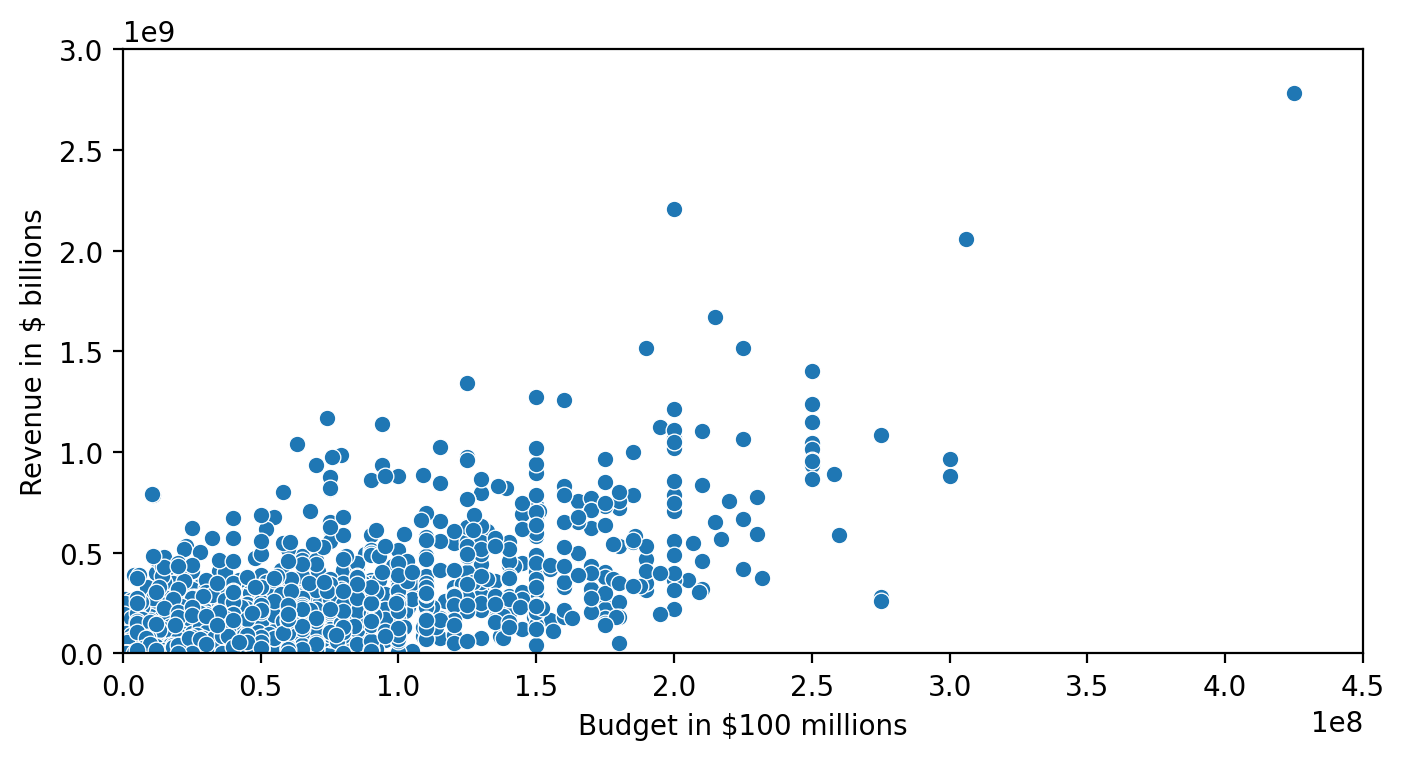

In [38]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

ax.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

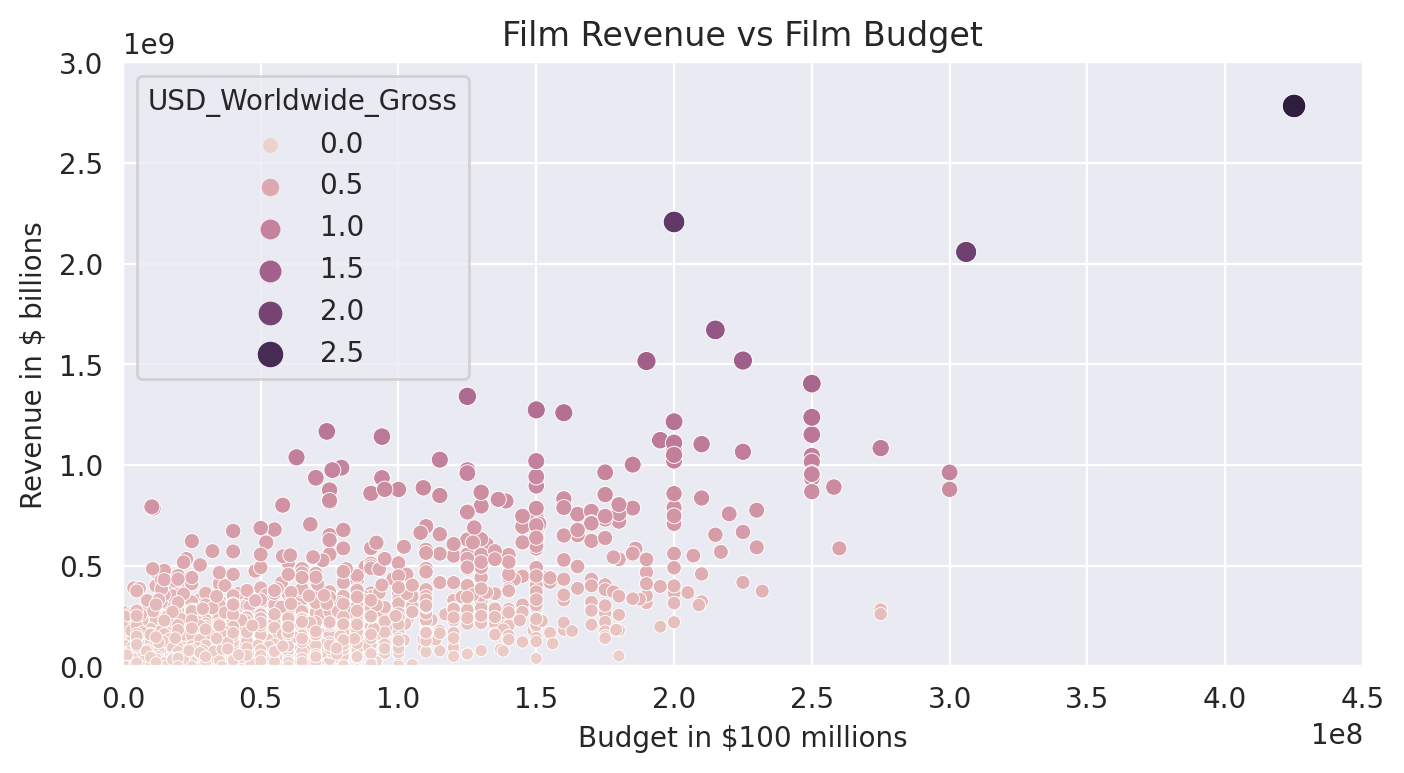

In [39]:
# Creating a bubble plot, using darkgrid theme

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  plt.title('Film Revenue vs Film Budget')
  ax = sns.scatterplot(data=data_clean, 
                  x='USD_Production_Budget', 
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')

  ax.set(ylim=(0,3000000000),
        xlim=(0,450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')


### Plotting Movie Releases over Time



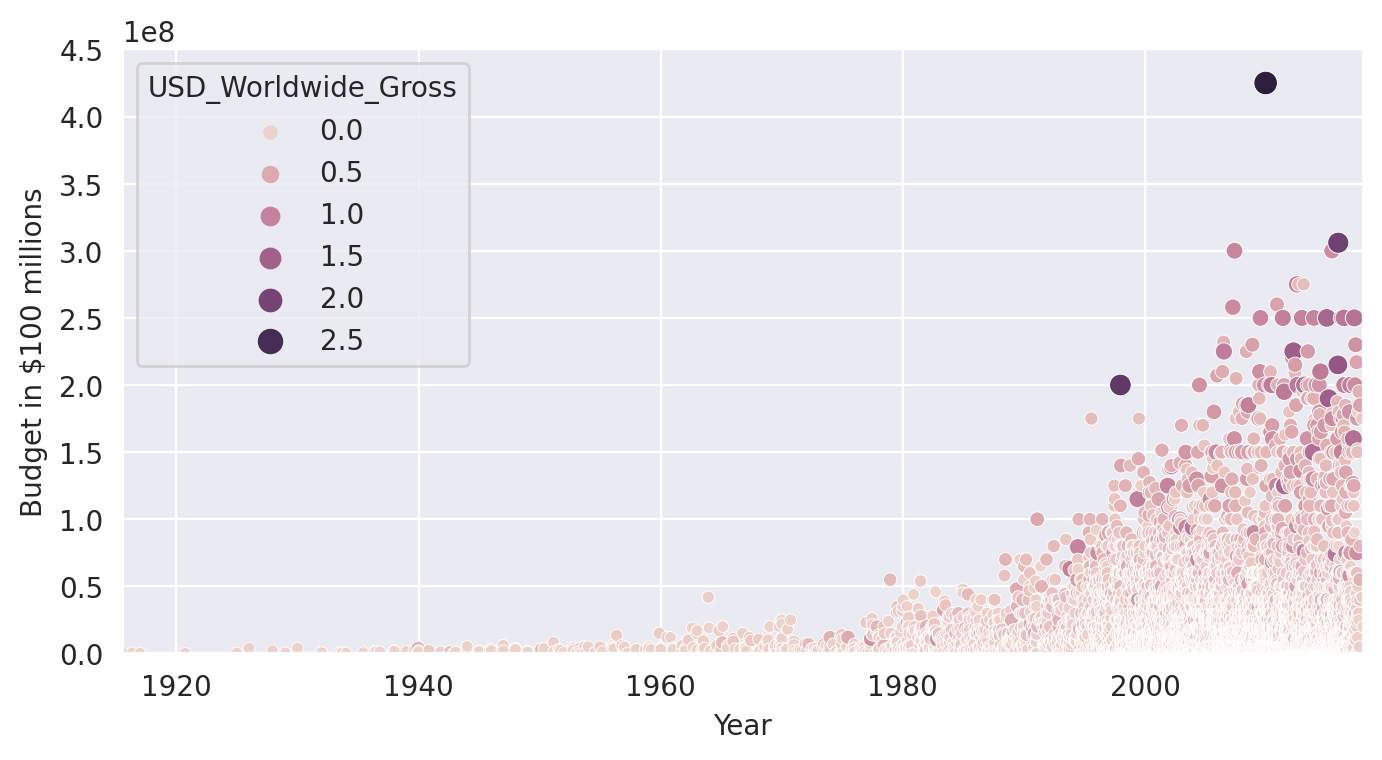

In [72]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax2 = sns.scatterplot(data=data_clean,
                  x='Release_Date',
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')
  ax2.set(ylim=(0,450000000),
          xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
          ylabel='Budget in $100 millions',
          xlabel='Year')
  
  plt.savefig('/content/drive/MyDrive/Python/sns_lr/output/1.jpg')

# Converting Years to Decades

We need to create a column that contains the decade in which the movies were released.

In [41]:
data_clean['Decade'] = data_clean.Release_Date.dt.year // 10 * 10 # OR dt_index = pd.DatetimeIndex(data_clean.Release_Date)

data_clean.head()

<ipython-input-41-54087677ac49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = data_clean.Release_Date.dt.year // 10 * 10 # OR dt_index = pd.DatetimeIndex(data_clean.Release_Date)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films into 2 DataFrames

In [56]:
old_films = data_clean.loc[data_clean.Decade < 1970].reset_index()
new_films = data_clean.loc[data_clean.Decade > 1970].reset_index()

print(f"There were {old_films.shape[0]} films released prior to 1970")
print(f"There were {new_films.shape[0]} films released after 1970")

There were 153 films released prior to 1970
There were 5122 films released after 1970


In [57]:
exp_old_film = old_films.iloc[old_films.USD_Production_Budget.idxmax()]

print(f"The most expensive film made prior to 1970 was {exp_old_film.Movie_Title}, at ${exp_old_film.USD_Production_Budget:,}.")

exp_new_film = new_films.iloc[new_films.USD_Production_Budget.idxmax()]

print(f"The most expensive film made after 1970 was {exp_new_film.Movie_Title}, at ${exp_new_film.USD_Production_Budget:,}.")

The most expensive film made prior to 1970 was Cleopatra, at $42,000,000.
The most expensive film made after 1970 was Avatar, at $425,000,000.


# Seaborn Regression Plots

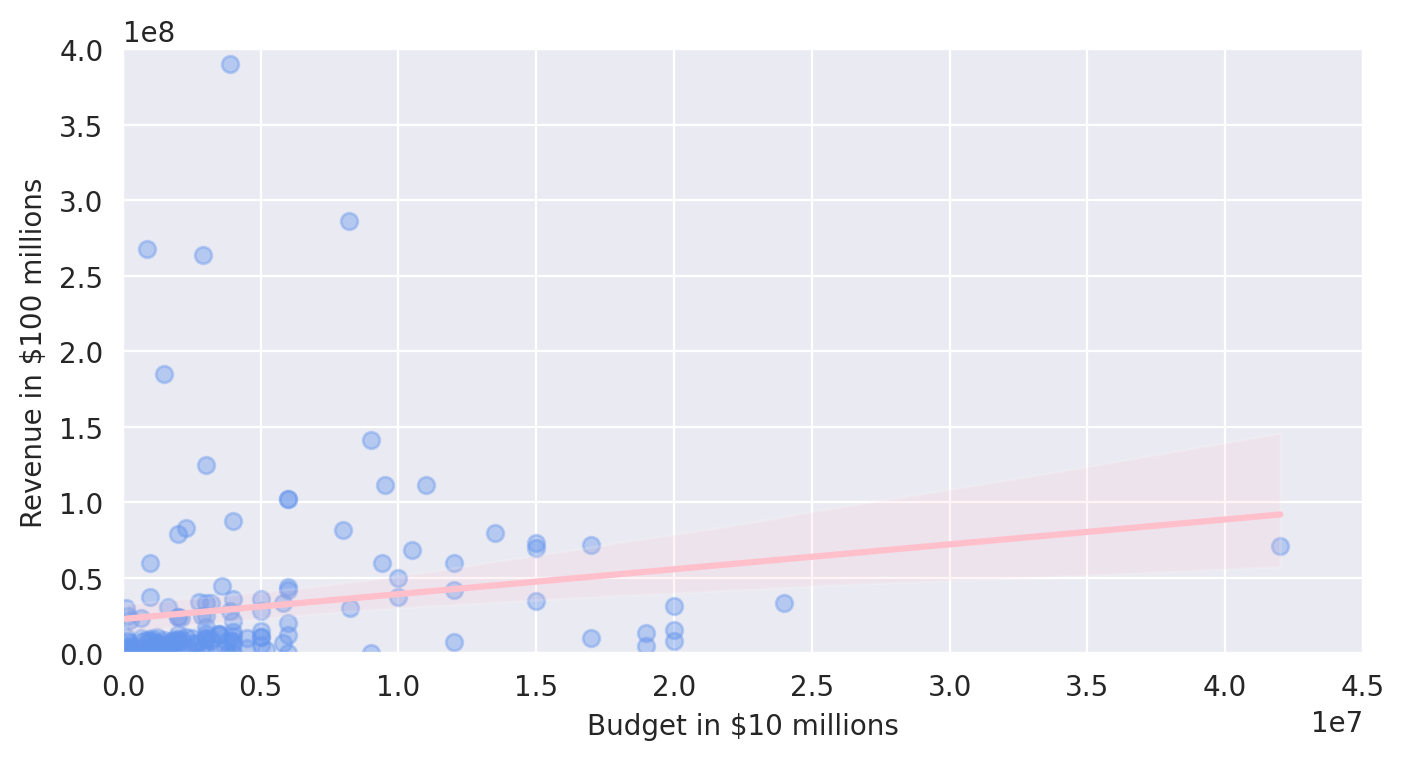

In [58]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  old_reg = sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              color = 'cornflowerblue',
              scatter_kws={'alpha':0.4},
              line_kws={'color':'pink'})
  
  old_reg.set(ylabel='Revenue in $100 millions',
              xlabel='Budget in $10 millions',
              xlim=(0,45000000),
              ylim=(0,400000000))

Using Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 


Interpreting the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

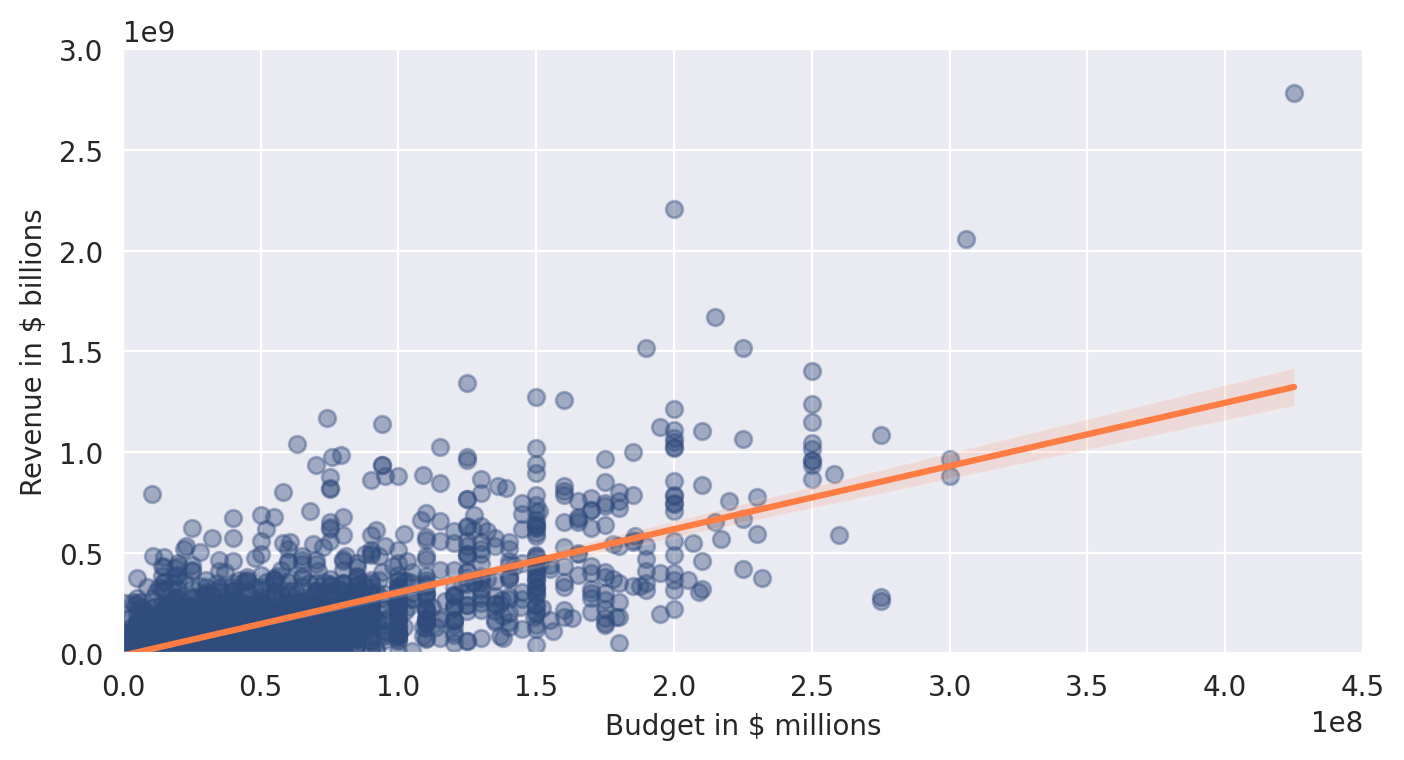

In [73]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  reg = sns.regplot(data=new_films,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    color='#2f4b7c',
                    scatter_kws = {'alpha':0.4},
                    line_kws = {'color':'#ff7c43'})
  
  reg.set(ylim=(0,3000000000),
          xlim=(0,450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $ millions')
  
plt.savefig("/content/drive/MyDrive/Python/sns_lr/output/2.jpg")

# Run Our Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [60]:
regression=LinearRegression() # Creating a linear regression object from the class LinearRegression

### Linear regression for the `old_films`:

In [61]:
# Creating the Explanatory Variable, or Feature
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Creating the Response Variable, or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


In [62]:
regression.fit(X,y)

LinearRegression()

In [63]:
regression.intercept_

array([-10278584.79397978])

In [64]:
regression.coef_

array([[3.13834648]])

In [65]:
# Getting the R-squared: goodness of fit

regression.score(X,y)

0.564250171393927

In [66]:
# Running a linear regression for old_films

regression_old = LinearRegression()

# Creating the Explanatory Variable, or Feature
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Creating the Response Variable, or Target
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression_old.fit(X_old, y_old)

LinearRegression()

In [67]:
regression_old.intercept_

array([22821538.63508039])

In [68]:
regression_old.coef_

array([[1.64771314]])

In [69]:
regression_old.score(X_old, y_old)

0.02937258620576877

It seems that for the data points before 1970, budget had very little predictive power on the movie's grossing.

# Making a Prediction

In [71]:
budget=350000000

revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * budget

print(f" For a $350 million film, the estimated revenue is around ${revenue_estimate:,.0f}.")

 For a $350 million film, the estimated revenue is around $1,088,142,683.
